# Load Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

# Loading the dataset

In [1]:
data = pd.read_csv('/Users/brundamariswamy/Desktop/BrundaClass/Machine learning/Project/icml_face_data.csv')
data.count()

NameError: name 'pd' is not defined

In [2]:
data.info()

NameError: name 'data' is not defined

In [ ]:
data.head()

# Data Preprocessing

In [2]:
#Check for duplicates
#First copy data into new dataframe
newdata = data.copy()
newdata.drop_duplicates(inplace=True)
newdata.count()

#From rsult we see that dataset has no duplicates

NameError: name 'data' is not defined

In [20]:
data[' Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [21]:
data[' Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64

[Text(0, 0, 'Angry'),
 Text(1, 0, 'Disgust'),
 Text(2, 0, 'Fear'),
 Text(3, 0, 'Happy'),
 Text(4, 0, 'Sad'),
 Text(5, 0, 'Surprise'),
 Text(6, 0, 'Neutral')]

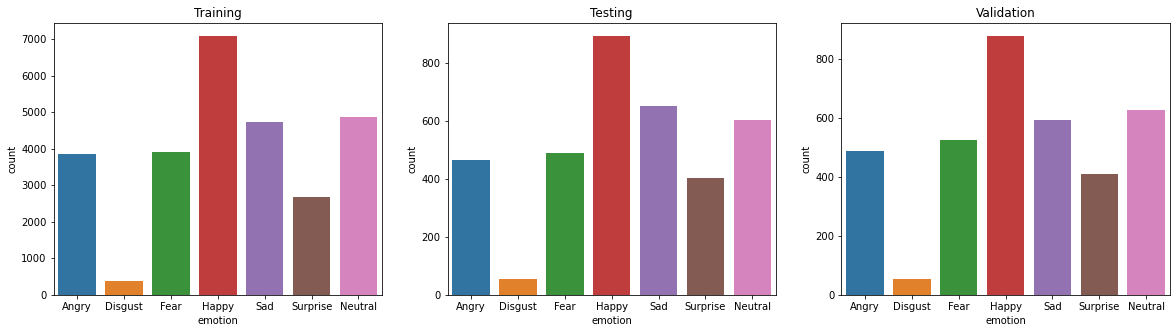

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
sns.countplot(data = newdata[newdata[' Usage']=='Training'], x='emotion', ax=ax1).set_title('Training')
ax1.set_xticklabels(emotions.values())
sns.countplot(data = newdata[newdata[' Usage']=='PublicTest'], x='emotion', ax=ax2).set_title('Testing')
ax2.set_xticklabels(emotions.values())
sns.countplot(data = newdata[newdata[' Usage']=='PrivateTest'], x='emotion', ax=ax3).set_title('Validation')
ax3.set_xticklabels(emotions.values())

In [2]:
def prepare_data(newdata):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(newdata), 48, 48))
    image_label = np.array(list(map(int, newdata['emotion'])))
    
    for i, row in enumerate(newdata.index):
        image = np.fromstring(newdata.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = newdata[newdata['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = newdata[newdata['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

In [3]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [4]:
#Define training, validation and test data:
train_image_array, train_image_label = prepare_data(newdata[newdata[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(newdata[newdata[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(newdata[newdata[' Usage']=='PublicTest'])

NameError: name 'newdata' is not defined

In [50]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

In [ ]:

train_labels = to_categorical(train_image_label)
val_labels = to_categorical(val_image_label)
test_labels = to_categorical(test_image_label)

In [1]:

plot_all_emotions()

NameError: name 'plot_all_emotions' is not defined

In [2]:
plot_examples(label=0)

NameError: name 'plot_examples' is not defined